In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from collections import defaultdict
from collections import Counter


In [3]:

def show_results(root_dir):
    summary_results = []
    total_json_count = 0
    all_model_paths = []

    # === Traverse and summarize ===
    for group_dir in sorted(root_dir.iterdir()):
        if not group_dir.is_dir():
            continue

        metrics_list = []

        for subdir in group_dir.iterdir():
            if not subdir.is_dir():
                continue

            json_file = subdir / "results.json"
            if json_file.exists():
                total_json_count += 1
                with open(json_file, "r") as f:
                    data = json.load(f)
                    data["group"] = group_dir.name
                    metrics_list.append(data)
                    all_model_paths.append(data.get("model_path", "unknown"))

        if metrics_list:
            df = pd.DataFrame(metrics_list)
            df_mean = df.drop(columns=["dataset", "freq", "model_path"]).mean(numeric_only=True)
            df_mean["group"] = group_dir.name
            summary_results.append(df_mean)

    # === Combine summaries ===
    summary_df = pd.DataFrame(summary_results)
    summary_df.sort_values("group", inplace=True)

    # === Display summary table ===
    print("\n📊 Summary of Mean Metrics per Dataset Group:")
    display(summary_df)

    # === Compute overall global mean across all groups ===
    global_means = summary_df.drop(columns=["group"]).mean(numeric_only=True)
    print("\n📌 Global Mean Across All Groups:")
    print(global_means.round(4))

    # === Determine model name to display in title ===
    model_name = Counter(all_model_paths).most_common(1)[0][0] if all_model_paths else "Unknown Model"

    # === Visualization ===
    plt.figure(figsize=(12, 6))
    for metric in ["mse", "mae", "smape", "wape", "nrmse"]:
        if metric in summary_df.columns:
            plt.plot(summary_df["group"], summary_df[metric], marker='o', label=metric)

    plt.xticks(rotation=45)
    plt.xlabel("Dataset Group")
    plt.ylabel("Metric Value")
    plt.title(f"Average Forecasting Metrics by Dataset Group\nModel: {model_name} pred len: {summary_df['pred_len'][0]} context len: {summary_df['context_len'][0]}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # === Total json count ===
    print(f"\n🔢 Total number of results.json files found: {total_json_count}")

## TimesFM 200m


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,0.092608,0.255055,0.138591,0.182649,0.390547,3693.333333,2888.451090,3.994347,10.0,128.0,crypto10_1d
1,0.012949,0.172356,0.066786,0.076747,0.130814,20880.000000,18160.546875,22.872678,10.0,128.0,crypto10_1h
2,0.019192,0.194858,0.076654,0.091778,0.166112,8853.333333,7392.073730,10.196857,10.0,128.0,crypto10_1m
3,0.060080,0.235827,0.135246,0.151250,0.262754,6920.000000,6179.074219,7.546202,10.0,128.0,forex_datasets_1d
4,0.018419,0.185430,0.080419,0.095245,0.156918,20720.000000,17725.246745,23.275421,10.0,128.0,forex_datasets_1h
5,0.054268,0.261148,0.129388,0.149344,0.254971,12200.000000,10563.588867,13.754068,10.0,128.0,forex_datasets_1m
6,0.422649,0.710717,0.408444,0.524546,0.835369,2040.000000,1600.562581,2.217127,10.0,128.0,forex_datasets_1wk
7,0.077344,0.345456,0.133580,0.177281,0.364478,7280.000000,5514.909912,8.090483,10.0,128.0,futures_datasets_1d
8,0.021575,0.154593,0.076712,0.086801,0.166202,16160.000000,14281.680664,17.855382,10.0,128.0,futures_datasets_1h
9,0.192662,0.347075,0.200278,0.242223,0.381411,9140.000000,7848.489827,10.493158,10.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                0.1265
smape              0.3340
mae                0.1748
wape               0.2135
nrmse              0.3725
num_elements    8522.8290
abs_sum         7245.6648
total_time         9.5985
pred_len          10.0000
context_len      128.0000
dtype: float64


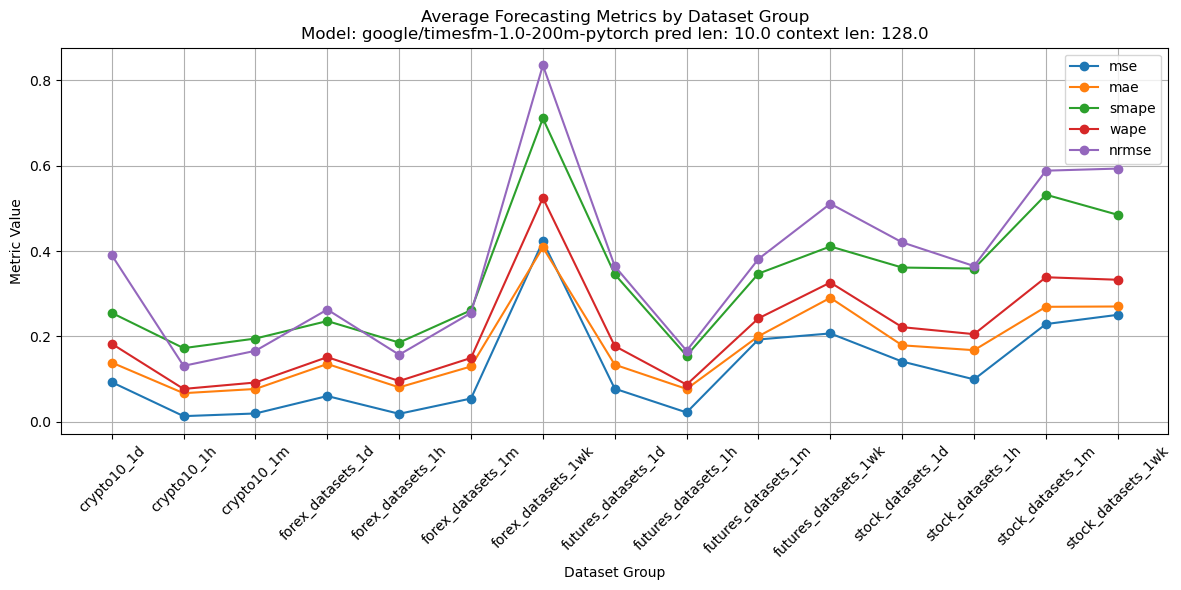


🔢 Total number of results.json files found: 908


In [7]:
#config
# Define the root result directory
root_dir = Path(r"results\tsfm\tsfm_200m_of1\h10")
show_results(root_dir)


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,0.188394,0.334150,0.202652,0.268382,0.561755,3653.333333,2840.513428,1.161069,20.0,128.0,crypto10_1d
1,0.022497,0.218380,0.091526,0.105182,0.172451,20880.000000,18160.557617,6.577403,20.0,128.0,crypto10_1h
2,0.044851,0.254009,0.118202,0.141793,0.253876,8853.333333,7392.073242,2.764555,20.0,128.0,crypto10_1m
3,0.104252,0.321491,0.194477,0.217566,0.350702,6920.000000,6179.074707,2.385353,20.0,128.0,forex_datasets_1d
4,0.036663,0.246061,0.117000,0.138566,0.221180,20693.333333,17704.054688,6.741689,20.0,128.0,forex_datasets_1h
5,0.093660,0.327263,0.173241,0.200199,0.332143,12160.000000,10519.006510,4.098102,20.0,128.0,forex_datasets_1m
6,0.829629,0.919822,0.610918,0.787282,1.175640,2000.000000,1563.865031,0.724654,20.0,128.0,forex_datasets_1wk
7,0.163540,0.458918,0.199860,0.266064,0.533969,7240.000000,5461.366089,2.383881,20.0,128.0,futures_datasets_1d
8,0.042121,0.217544,0.115100,0.130238,0.232227,16160.000000,14281.685547,5.438113,20.0,128.0,futures_datasets_1h
9,0.222697,0.396909,0.235595,0.283884,0.446315,9120.000000,7832.895752,3.067882,20.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                0.2346
smape              0.4333
mae                0.2501
wape               0.3071
nrmse              0.5161
num_elements    8500.5135
abs_sum         7219.2052
total_time         2.7999
pred_len          20.0000
context_len      128.0000
dtype: float64


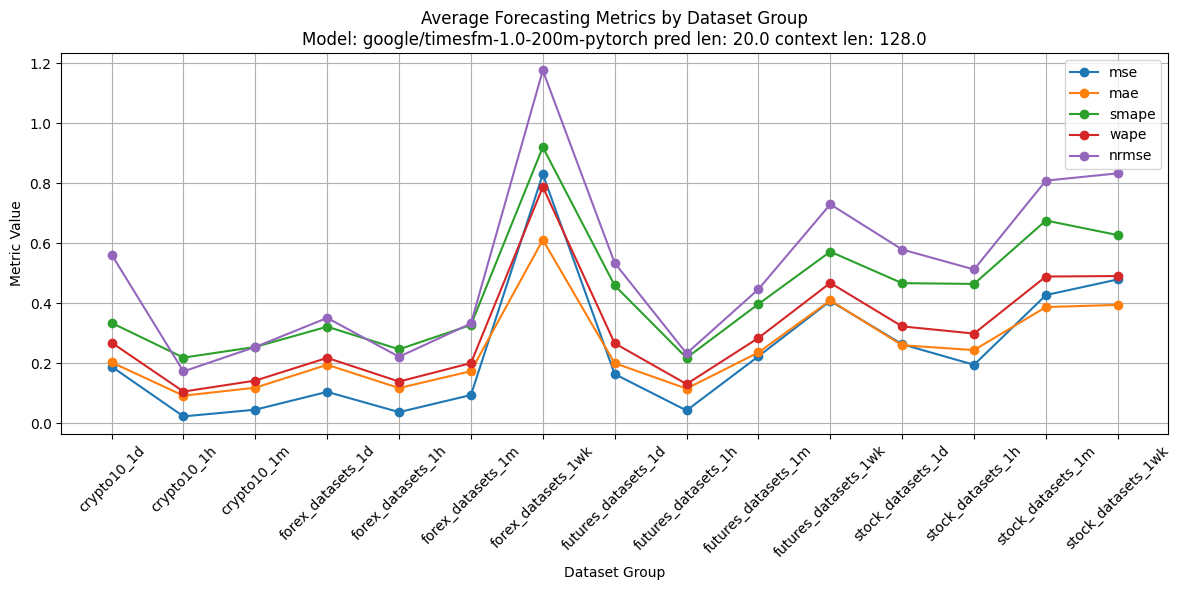


🔢 Total number of results.json files found: 908


In [4]:
#config
# Define the root result directory
root_dir = Path(r"results\tsfm\tsfm_200m_of1\h20")
show_results(root_dir)


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,0.290396,0.416169,0.265617,0.349766,0.696722,3680.000000,2867.131429,1.374428,30.0,128.0,crypto10_1d
1,0.033788,0.269520,0.115124,0.132307,0.211345,20880.000000,18160.559570,7.708606,30.0,128.0,crypto10_1h
2,0.068893,0.308458,0.146914,0.177035,0.316151,8800.000000,7310.747884,3.229276,30.0,128.0,crypto10_1m
3,0.159889,0.371515,0.242575,0.271295,0.436443,6900.000000,6164.434570,2.486581,30.0,128.0,forex_datasets_1d
4,0.055844,0.292803,0.145570,0.173330,0.273048,20640.000000,17603.581380,7.631246,30.0,128.0,forex_datasets_1h
5,0.148448,0.414046,0.229119,0.265029,0.421811,12120.000000,10474.398112,4.458304,30.0,128.0,forex_datasets_1m
6,1.096010,0.990230,0.725844,0.934296,1.350439,2040.000000,1600.562541,0.780504,30.0,128.0,forex_datasets_1wk
7,0.231276,0.523705,0.243088,0.324017,0.635384,7200.000000,5408.967285,2.595062,30.0,128.0,futures_datasets_1d
8,0.064120,0.283257,0.149996,0.169488,0.286126,16080.000000,14230.698242,5.846544,30.0,128.0,futures_datasets_1h
9,0.261452,0.453337,0.275724,0.331327,0.507703,9080.000000,7780.715047,3.336322,30.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                0.3378
smape              0.5031
mae                0.3123
wape               0.3824
nrmse              0.6236
num_elements    8482.6778
abs_sum         7197.0067
total_time         3.1544
pred_len          30.0000
context_len      128.0000
dtype: float64


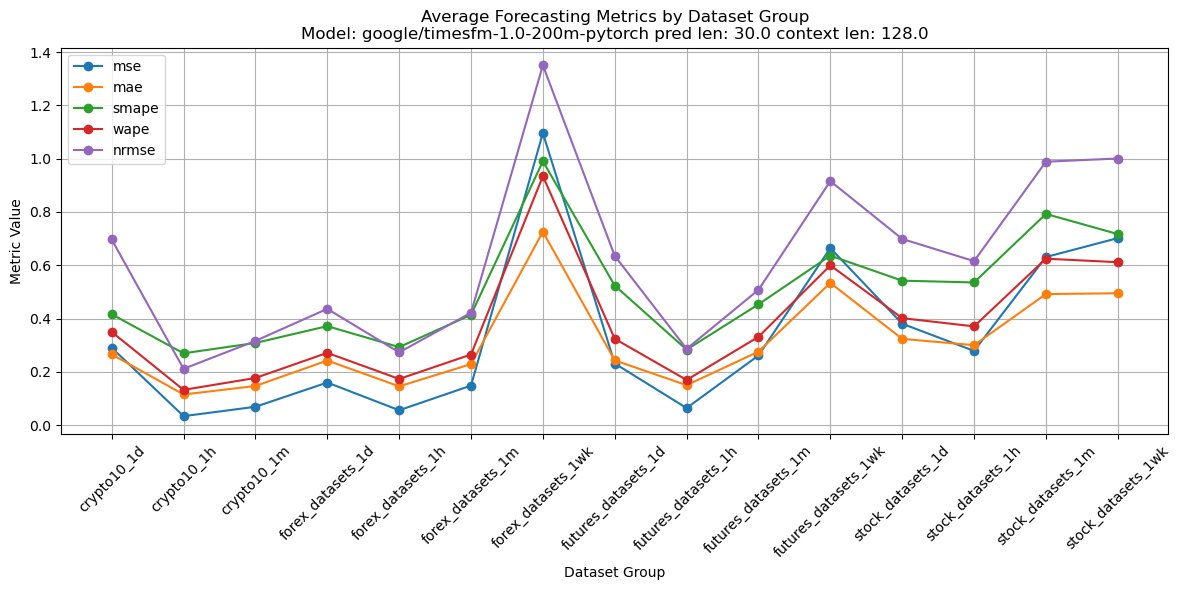


🔢 Total number of results.json files found: 908


In [8]:
#config
# Define the root result directory
root_dir = Path(r"results\tsfm\tsfm_200m_of1\h30")
show_results(root_dir)


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,0.571246,0.562221,0.397239,0.532316,0.998509,3600.000000,2775.409180,0.453118,60.0,128.0,crypto10_1d
1,0.073083,0.350614,0.172273,0.197989,0.310806,20880.000000,18160.557617,2.235666,60.0,128.0,crypto10_1h
2,0.154666,0.420995,0.233014,0.280693,0.473637,8800.000000,7310.747721,0.949188,60.0,128.0,crypto10_1m
3,0.302304,0.508109,0.357625,0.398764,0.591901,6840.000000,6124.638184,0.894300,60.0,128.0,forex_datasets_1d
4,0.111372,0.384621,0.211209,0.251078,0.386633,20560.000000,17539.440104,2.221624,60.0,128.0,forex_datasets_1h
5,0.288762,0.529443,0.328838,0.381547,0.595482,12000.000000,10344.388346,1.286513,60.0,128.0,forex_datasets_1m
6,1.743990,1.207815,0.953391,1.235216,1.704435,1920.000000,1488.001546,0.262985,60.0,128.0,forex_datasets_1wk
7,0.499516,0.658212,0.369096,0.498342,0.951142,7080.000000,5251.835938,0.808788,60.0,128.0,futures_datasets_1d
8,0.120162,0.355682,0.209828,0.237095,0.391690,16080.000000,14230.702148,2.003497,60.0,128.0,futures_datasets_1h
9,0.344902,0.542962,0.349299,0.416965,0.624160,9000.000000,7713.614176,1.057334,60.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                0.6180
smape              0.6470
mae                0.4484
wape               0.5550
nrmse              0.8634
num_elements    8412.9351
abs_sum         7119.8149
total_time         0.9629
pred_len          60.0000
context_len      128.0000
dtype: float64


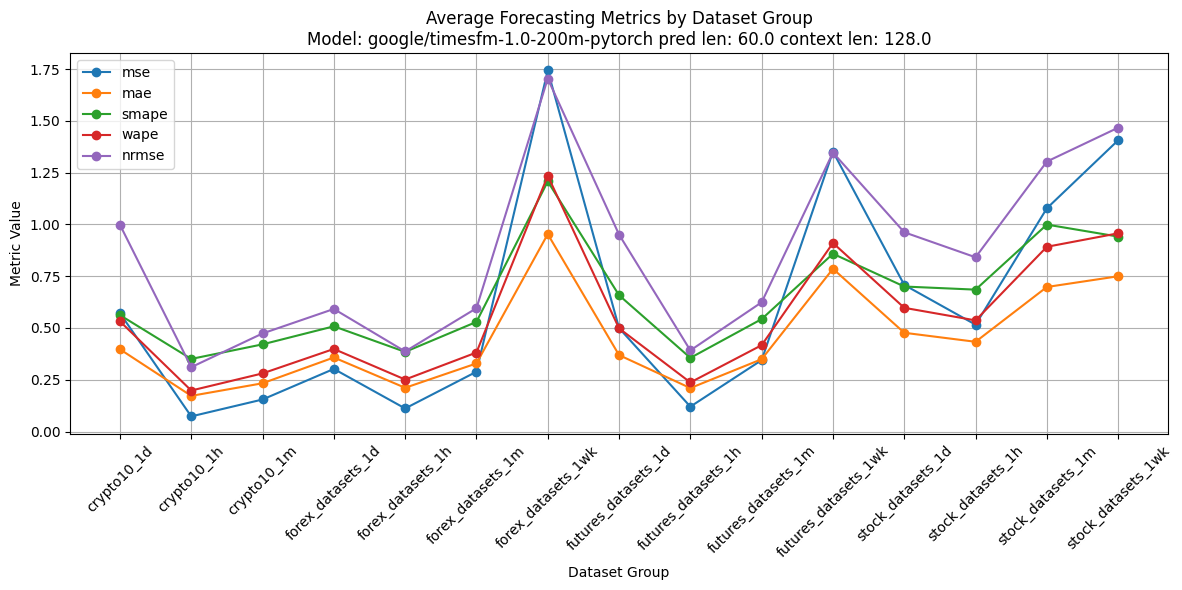


🔢 Total number of results.json files found: 908


In [5]:
#config
# Define the root result directory
root_dir = Path(r"results\tsfm\tsfm_200m_of1\h60")
show_results(root_dir)


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,0.878540,0.699590,0.539230,0.733351,1.232452,3584.000000,2755.319255,0.455593,96.0,128.0,crypto10_1d
1,0.108872,0.433038,0.219724,0.253033,0.379804,20736.000000,18006.963867,2.372696,96.0,128.0,crypto10_1h
2,0.229687,0.532558,0.303543,0.369915,0.581463,8704.000000,7165.317383,0.999717,96.0,128.0,crypto10_1m
3,0.391134,0.592960,0.405941,0.460200,0.685518,6720.000000,5925.901855,0.827379,96.0,128.0,forex_datasets_1d
4,0.184193,0.467761,0.269062,0.319020,0.490193,20608.000000,17631.636068,2.302822,96.0,128.0,forex_datasets_1h
5,0.377881,0.598016,0.397903,0.463290,0.688937,11904.000000,10240.671549,1.363164,96.0,128.0,forex_datasets_1m
6,3.753291,1.437489,1.531117,1.951451,2.423497,1920.000000,1488.001587,0.266966,96.0,128.0,forex_datasets_1wk
7,0.718523,0.776135,0.461004,0.614596,1.112553,7200.000000,5421.123291,0.831817,96.0,128.0,futures_datasets_1d
8,0.187256,0.474867,0.261675,0.296063,0.489598,16128.000000,14254.699219,1.938518,96.0,128.0,futures_datasets_1h
9,0.466167,0.641833,0.431411,0.511711,0.760848,9024.000000,7729.359985,1.016496,96.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                1.0094
smape              0.7869
mae                0.6042
wape               0.7505
nrmse              1.0851
num_elements    8374.2386
abs_sum         7074.0949
total_time         0.9873
pred_len          96.0000
context_len      128.0000
dtype: float64


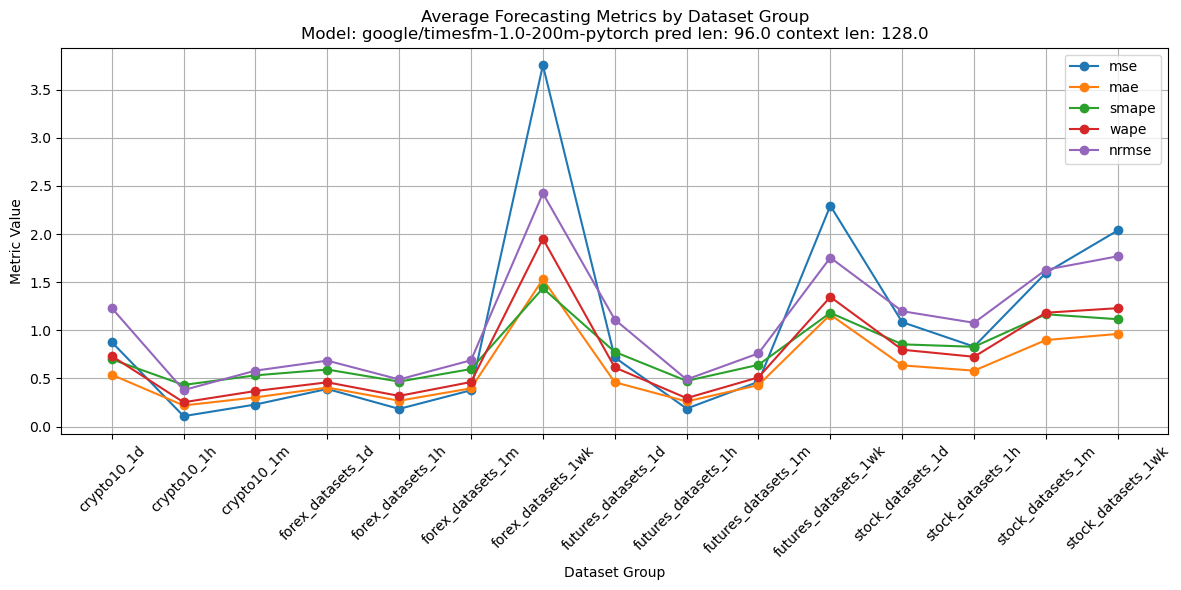


🔢 Total number of results.json files found: 908


In [9]:
#config
# Define the root result directory
root_dir = Path(r"results\tsfm\tsfm_200m_of1\h96")
show_results(root_dir)

## TimesFM 500m


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,0.124720,0.266968,0.148915,0.196768,0.446175,3693.333333,2888.451090,3.600215,10.0,128.0,crypto10_1d
1,0.013752,0.173226,0.068574,0.078802,0.134810,20880.000000,18160.546875,20.081943,10.0,128.0,crypto10_1h
2,0.019911,0.190872,0.077266,0.092564,0.169193,8853.333333,7392.073730,8.570558,10.0,128.0,crypto10_1m
3,0.056182,0.238225,0.135910,0.152098,0.257793,6920.000000,6179.074219,6.777006,10.0,128.0,forex_datasets_1d
4,0.019063,0.190962,0.082561,0.097792,0.159448,20720.000000,17725.246745,19.920009,10.0,128.0,forex_datasets_1h
5,0.055416,0.253504,0.128341,0.148109,0.258171,12200.000000,10563.588867,11.779562,10.0,128.0,forex_datasets_1m
6,0.519808,0.674965,0.401011,0.518700,0.909688,2040.000000,1600.562581,2.102903,10.0,128.0,forex_datasets_1wk
7,0.081026,0.350428,0.138497,0.183867,0.373944,7280.000000,5514.909912,7.119717,10.0,128.0,futures_datasets_1d
8,0.022207,0.160773,0.076282,0.086314,0.168620,16160.000000,14281.680664,16.009744,10.0,128.0,futures_datasets_1h
9,0.204984,0.325465,0.196372,0.237291,0.391957,9140.000000,7848.489827,8.949482,10.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                0.1338
smape              0.3290
mae                0.1726
wape               0.2113
nrmse              0.3803
num_elements    8522.8290
abs_sum         7245.6648
total_time         8.3643
pred_len          10.0000
context_len      128.0000
dtype: float64


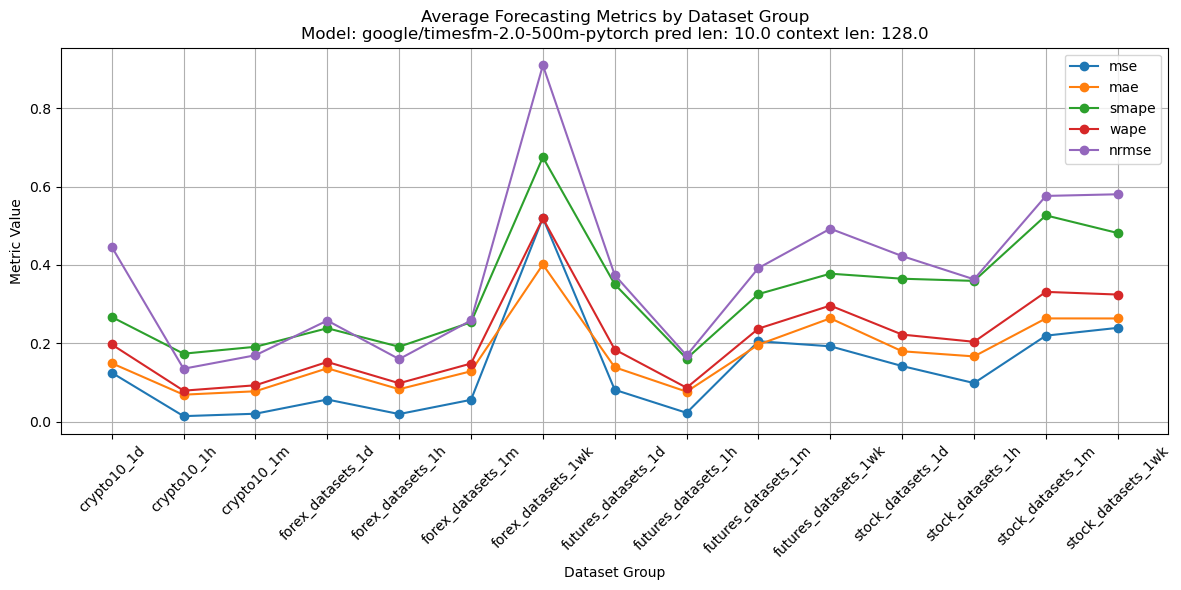


🔢 Total number of results.json files found: 908


In [5]:
#config
# Define the root result directory
root_dir = Path(r"results\tsfm\tsfm_500m_of1\h10")
show_results(root_dir)


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,0.306698,0.380818,0.238696,0.317997,0.696533,3653.333333,2840.513428,2.910954,20.0,128.0,crypto10_1d
1,0.026006,0.226241,0.099422,0.114253,0.185372,20880.000000,18160.557617,14.415530,20.0,128.0,crypto10_1h
2,0.049619,0.264604,0.124838,0.149711,0.267086,8853.333333,7392.073242,6.257392,20.0,128.0,crypto10_1m
3,0.112654,0.332766,0.202327,0.226520,0.367477,6920.000000,6179.074707,4.730810,20.0,128.0,forex_datasets_1d
4,0.041968,0.261097,0.124648,0.147652,0.236065,20693.333333,17704.054688,14.914697,20.0,128.0,forex_datasets_1h
5,0.108403,0.327488,0.182215,0.210468,0.359945,12160.000000,10519.006510,9.194974,20.0,128.0,forex_datasets_1m
6,0.873817,0.849243,0.570297,0.743359,1.191053,2000.000000,1563.865031,1.493857,20.0,128.0,forex_datasets_1wk
7,0.168540,0.473096,0.206826,0.275306,0.541821,7240.000000,5461.366089,4.774471,20.0,128.0,futures_datasets_1d
8,0.046070,0.238226,0.121479,0.137456,0.242869,16160.000000,14281.685547,11.927652,20.0,128.0,futures_datasets_1h
9,0.240037,0.389825,0.239044,0.287559,0.471192,9120.000000,7832.895752,6.190209,20.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                0.2455
smape              0.4356
mae                0.2516
wape               0.3095
nrmse              0.5314
num_elements    8500.5135
abs_sum         7219.2052
total_time         6.0177
pred_len          20.0000
context_len      128.0000
dtype: float64


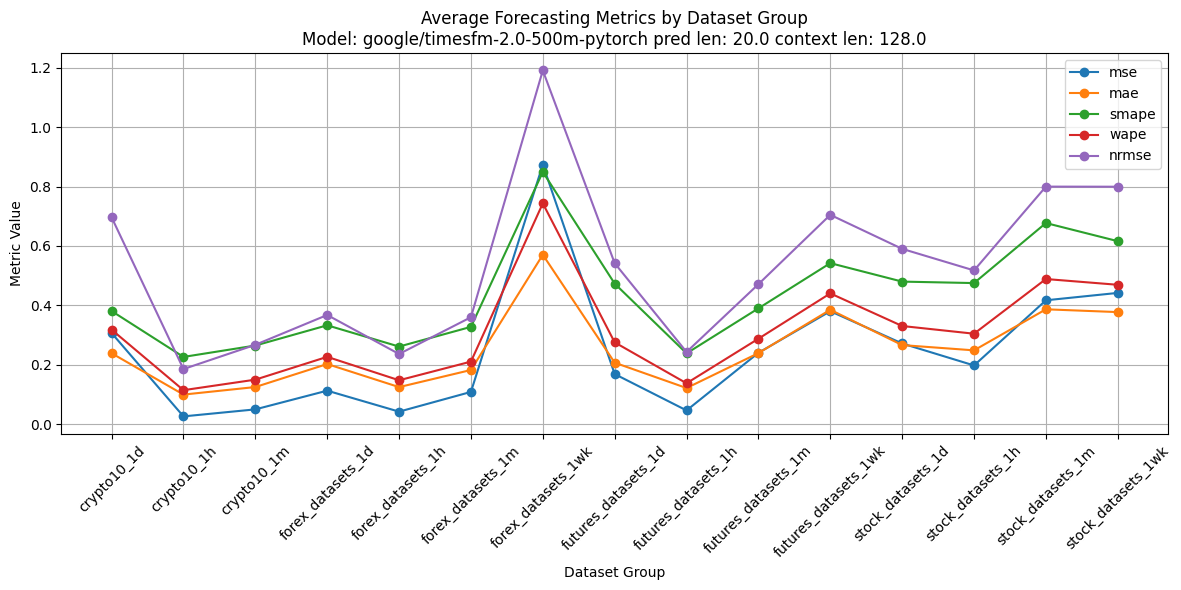


🔢 Total number of results.json files found: 908


In [6]:
#config
# Define the root result directory
root_dir = Path(r"results\tsfm\tsfm_500m_of1\h20")
show_results(root_dir)


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,0.422928,0.429267,0.291890,0.385835,0.824827,3680.000000,2867.131429,1.327957,30.0,128.0,crypto10_1d
1,0.036966,0.268403,0.119624,0.137473,0.220985,20880.000000,18160.559570,6.885046,30.0,128.0,crypto10_1h
2,0.075099,0.325628,0.153516,0.185032,0.330067,8800.000000,7310.747884,3.009890,30.0,128.0,crypto10_1m
3,0.165569,0.381955,0.245213,0.274477,0.444683,6900.000000,6164.434570,2.344885,30.0,128.0,forex_datasets_1d
4,0.064356,0.309693,0.155408,0.185032,0.292967,20640.000000,17603.581380,6.738590,30.0,128.0,forex_datasets_1h
5,0.162479,0.393365,0.229059,0.264851,0.444750,12120.000000,10474.398112,3.985664,30.0,128.0,forex_datasets_1m
6,0.977598,0.887668,0.625461,0.806173,1.267911,2040.000000,1600.562541,0.836473,30.0,128.0,forex_datasets_1wk
7,0.263044,0.552795,0.265755,0.354764,0.683320,7200.000000,5408.967285,2.390527,30.0,128.0,futures_datasets_1d
8,0.070561,0.304796,0.158508,0.179106,0.300153,16080.000000,14230.698242,5.630979,30.0,128.0,futures_datasets_1h
9,0.283871,0.444595,0.280405,0.336548,0.537450,9080.000000,7780.715047,2.968761,30.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                0.3345
smape              0.5011
mae                0.3071
wape               0.3763
nrmse              0.6307
num_elements    8482.6778
abs_sum         7197.0067
total_time         2.8894
pred_len          30.0000
context_len      128.0000
dtype: float64


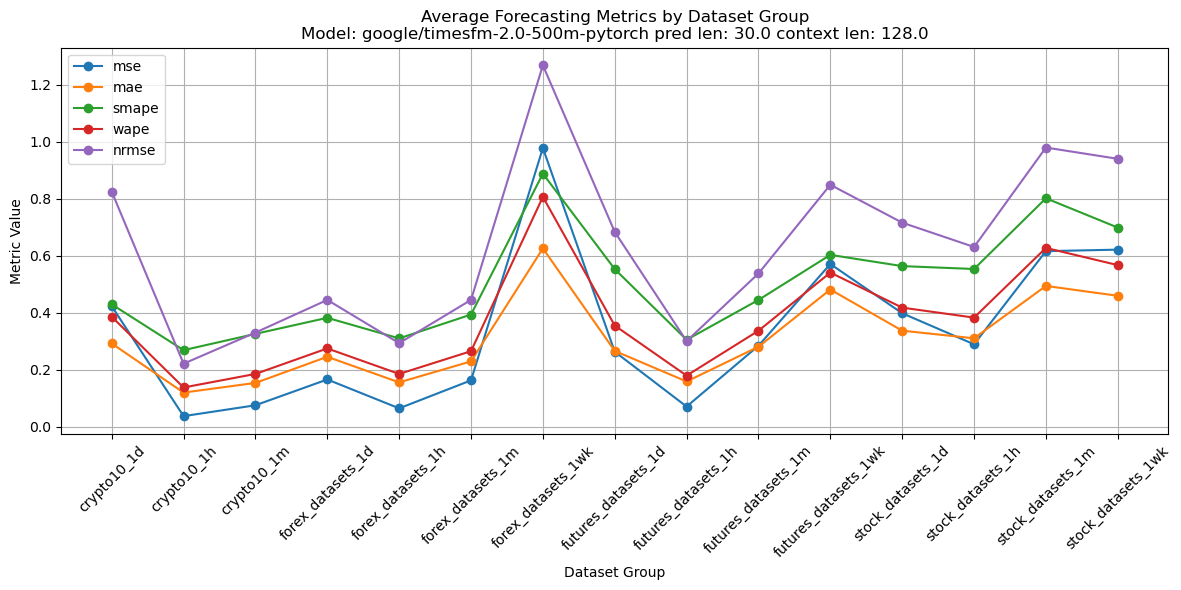


🔢 Total number of results.json files found: 908


In [6]:
#config
# Define the root result directory
root_dir = Path(r"results\tsfm\tsfm_500m_of1\h30")
show_results(root_dir)


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,0.795929,0.618369,0.459739,0.622929,1.159239,3600.000000,2775.409180,0.902629,60.0,128.0,crypto10_1d
1,0.077281,0.361350,0.178267,0.204883,0.319571,20880.000000,18160.557617,4.704183,60.0,128.0,crypto10_1h
2,0.163141,0.439953,0.239053,0.288016,0.486098,8800.000000,7310.747721,2.275101,60.0,128.0,crypto10_1m
3,0.312607,0.541557,0.356569,0.397854,0.603354,6840.000000,6124.638184,1.674391,60.0,128.0,forex_datasets_1d
4,0.139881,0.411435,0.231190,0.275106,0.428826,20560.000000,17539.440104,4.517032,60.0,128.0,forex_datasets_1h
5,0.319056,0.530786,0.335243,0.388801,0.630204,12000.000000,10344.388346,2.903332,60.0,128.0,forex_datasets_1m
6,1.369664,1.048185,0.764694,0.986656,1.496807,1920.000000,1488.001546,0.498453,60.0,128.0,forex_datasets_1wk
7,0.591408,0.700403,0.401643,0.542692,1.033779,7080.000000,5251.835938,1.655020,60.0,128.0,futures_datasets_1d
8,0.126302,0.384940,0.218827,0.247263,0.401574,16080.000000,14230.702148,3.676298,60.0,128.0,futures_datasets_1h
9,0.390160,0.542360,0.366622,0.436716,0.677906,9000.000000,7713.614176,2.064998,60.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                0.5942
smape              0.6517
mae                0.4406
wape               0.5451
nrmse              0.8625
num_elements    8412.9351
abs_sum         7119.8149
total_time         1.9639
pred_len          60.0000
context_len      128.0000
dtype: float64


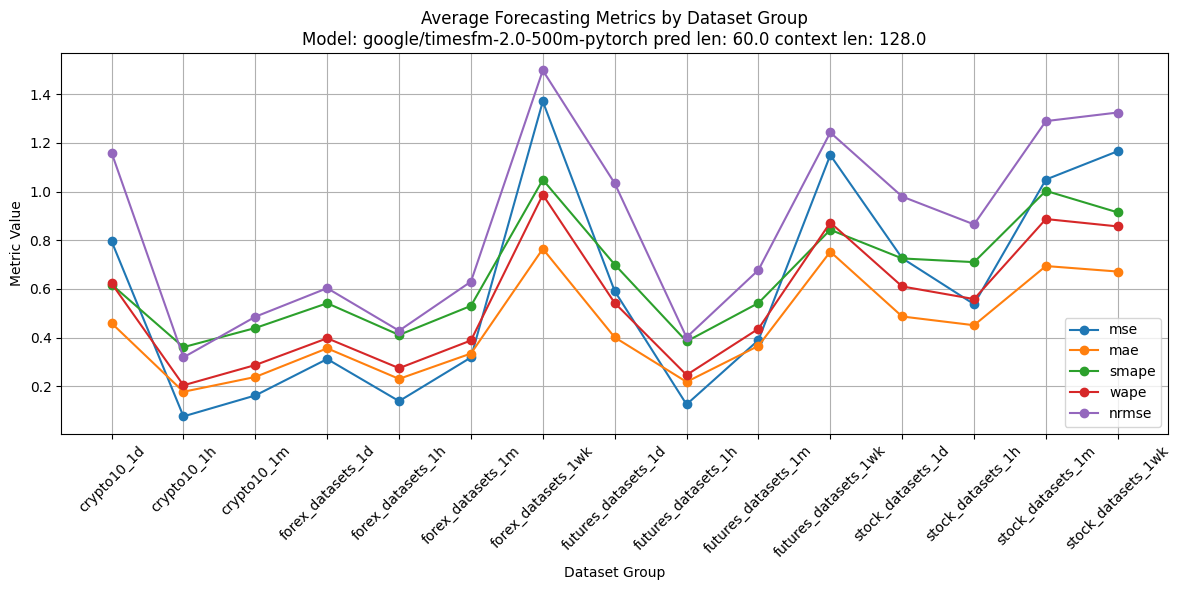


🔢 Total number of results.json files found: 908


In [7]:
#config
# Define the root result directory
root_dir = Path(r"results\tsfm\tsfm_500m_of1\h60")
show_results(root_dir)


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,1.275651,0.777921,0.657820,0.901977,1.501043,3584.000000,2755.319255,0.465700,96.0,128.0,crypto10_1d
1,0.106263,0.419566,0.215820,0.248533,0.374963,20736.000000,18006.963867,2.354477,96.0,128.0,crypto10_1h
2,0.264981,0.571621,0.333160,0.406429,0.625476,8704.000000,7165.317383,0.958935,96.0,128.0,crypto10_1m
3,0.430594,0.654025,0.445811,0.505474,0.727587,6720.000000,5925.901855,0.939740,96.0,128.0,forex_datasets_1d
4,0.216686,0.494924,0.287013,0.340292,0.528097,20608.000000,17631.636068,2.168664,96.0,128.0,forex_datasets_1h
5,0.440671,0.609860,0.421853,0.490706,0.741928,11904.000000,10240.671549,1.320845,96.0,128.0,forex_datasets_1m
6,2.950444,1.356815,1.303821,1.685226,2.229202,1920.000000,1488.001587,0.280996,96.0,128.0,forex_datasets_1wk
7,0.700693,0.792001,0.473009,0.631751,1.106400,7200.000000,5421.123291,0.814871,96.0,128.0,futures_datasets_1d
8,0.205973,0.481169,0.279272,0.315972,0.513485,16128.000000,14254.699219,1.804585,96.0,128.0,futures_datasets_1h
9,0.473364,0.619147,0.436363,0.517042,0.766018,9024.000000,7729.359985,0.957178,96.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                0.9156
smape              0.7867
mae                0.5844
wape               0.7291
nrmse              1.0696
num_elements    8374.2386
abs_sum         7074.0949
total_time         0.9498
pred_len          96.0000
context_len      128.0000
dtype: float64


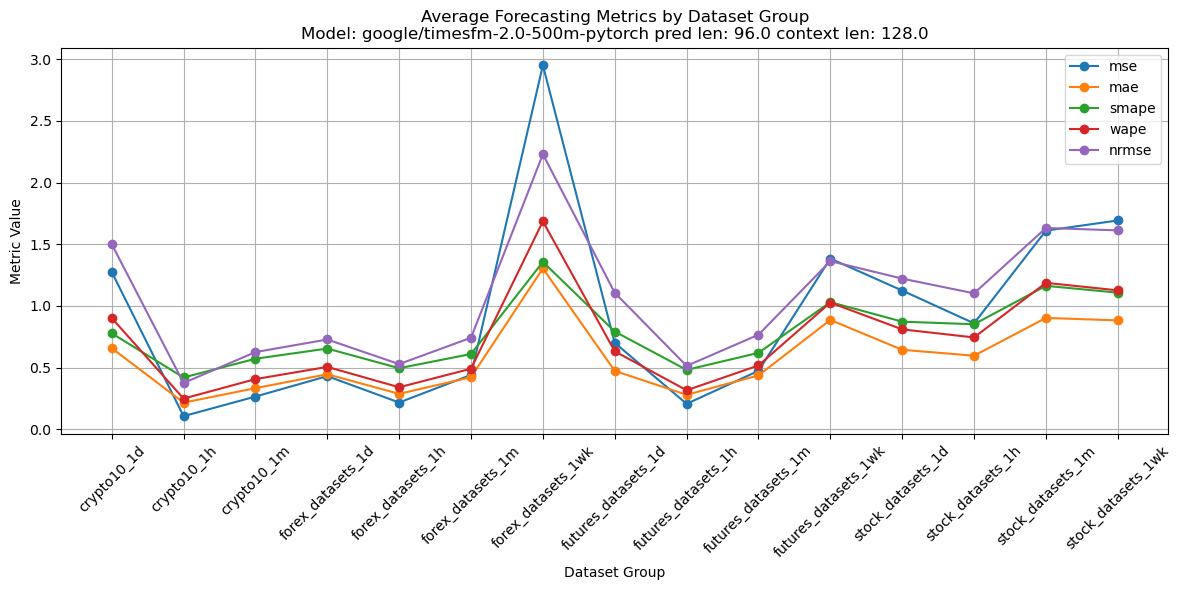


🔢 Total number of results.json files found: 908


In [4]:
#config
# Define the root result directory
root_dir = Path(r"results\tsfm\tsfm_500m_of1\h96")
show_results(root_dir)

## Chronos Small

In [ ]:
#config
# Define the root result directory
root_dir = Path(r"results\tsfm\tsfm_500m_of1\h10")
show_results(root_dir)

In [ ]:
#config
# Define the root result directory
root_dir = Path(r"")
show_results(root_dir)

In [ ]:
#config
# Define the root result directory
root_dir = Path(r"results\tsfm\tsfm_500m_of1\h30")
show_results(root_dir)

In [ ]:
#config
# Define the root result directory
root_dir = Path(r"")
show_results(root_dir)


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,1.275651,0.777921,0.657820,0.901977,1.501043,3584.000000,2755.319255,0.465700,96.0,128.0,crypto10_1d
1,0.106263,0.419566,0.215820,0.248533,0.374963,20736.000000,18006.963867,2.354477,96.0,128.0,crypto10_1h
2,0.264981,0.571621,0.333160,0.406429,0.625476,8704.000000,7165.317383,0.958935,96.0,128.0,crypto10_1m
3,0.430594,0.654025,0.445811,0.505474,0.727587,6720.000000,5925.901855,0.939740,96.0,128.0,forex_datasets_1d
4,0.216686,0.494924,0.287013,0.340292,0.528097,20608.000000,17631.636068,2.168664,96.0,128.0,forex_datasets_1h
5,0.440671,0.609860,0.421853,0.490706,0.741928,11904.000000,10240.671549,1.320845,96.0,128.0,forex_datasets_1m
6,2.950444,1.356815,1.303821,1.685226,2.229202,1920.000000,1488.001587,0.280996,96.0,128.0,forex_datasets_1wk
7,0.700693,0.792001,0.473009,0.631751,1.106400,7200.000000,5421.123291,0.814871,96.0,128.0,futures_datasets_1d
8,0.205973,0.481169,0.279272,0.315972,0.513485,16128.000000,14254.699219,1.804585,96.0,128.0,futures_datasets_1h
9,0.473364,0.619147,0.436363,0.517042,0.766018,9024.000000,7729.359985,0.957178,96.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                0.9156
smape              0.7867
mae                0.5844
wape               0.7291
nrmse              1.0696
num_elements    8374.2386
abs_sum         7074.0949
total_time         0.9498
pred_len          96.0000
context_len      128.0000
dtype: float64


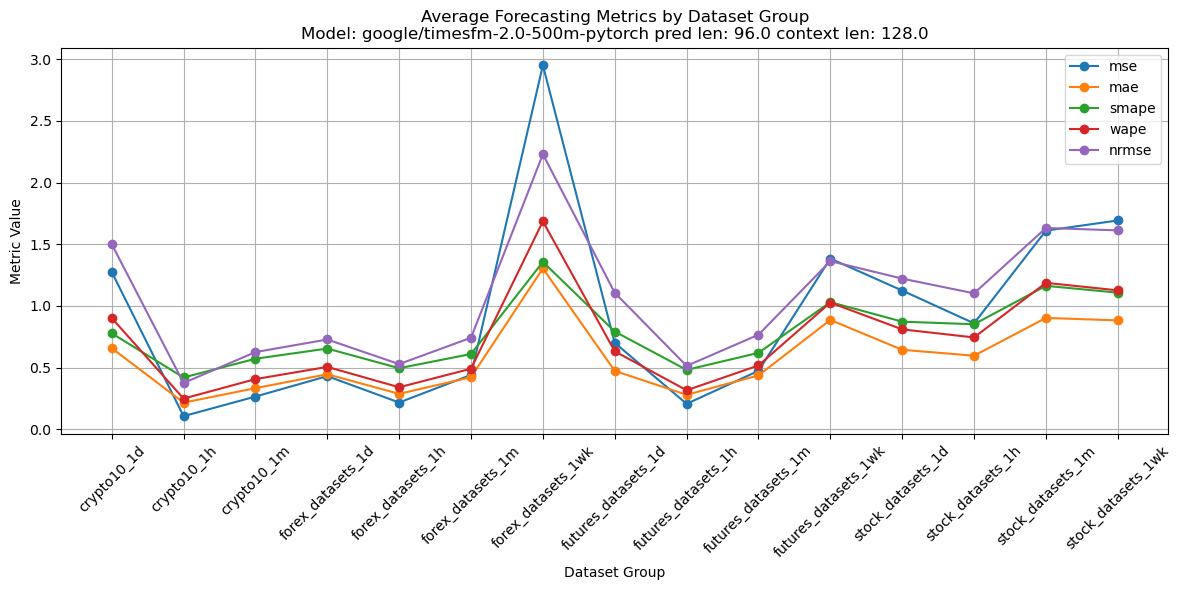


🔢 Total number of results.json files found: 908


In [ ]:
#config
# Define the root result directory
root_dir = Path(r"results\tsfm\tsfm_500m_of1\h96")
show_results(root_dir)

## Chronos Medium


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,0.083321,0.235177,0.126960,0.166727,0.372032,3693.333333,2888.451090,14.703225,10.0,128.0,crypto10_1d
1,0.012160,0.167344,0.064757,0.074416,0.126784,20880.000000,18160.546875,81.690835,10.0,128.0,crypto10_1h
2,0.018770,0.183108,0.074658,0.089324,0.164247,8853.333333,7392.073730,34.687376,10.0,128.0,crypto10_1m
3,0.051603,0.236014,0.133190,0.149078,0.248103,6920.000000,6179.074219,27.247289,10.0,128.0,forex_datasets_1d
4,0.017616,0.181168,0.078073,0.092443,0.153696,20720.000000,17725.246745,81.280644,10.0,128.0,forex_datasets_1h
5,0.065500,0.257821,0.131857,0.152257,0.272534,12200.000000,10563.588867,47.919635,10.0,128.0,forex_datasets_1m
6,0.529279,0.661211,0.367924,0.475562,0.899615,2040.000000,1600.562581,8.155457,10.0,128.0,forex_datasets_1wk
7,0.077823,0.340459,0.131608,0.174662,0.365296,7280.000000,5514.909912,28.622781,10.0,128.0,futures_datasets_1d
8,0.021515,0.151495,0.074536,0.084339,0.165970,16160.000000,14281.680664,63.337532,10.0,128.0,futures_datasets_1h
9,0.245448,0.317186,0.205076,0.248402,0.409829,9140.000000,7848.489827,35.604113,10.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                0.1302
smape              0.3200
mae                0.1652
wape               0.2018
nrmse              0.3683
num_elements    8522.8290
abs_sum         7245.6648
total_time        33.4243
pred_len          10.0000
context_len      128.0000
dtype: float64


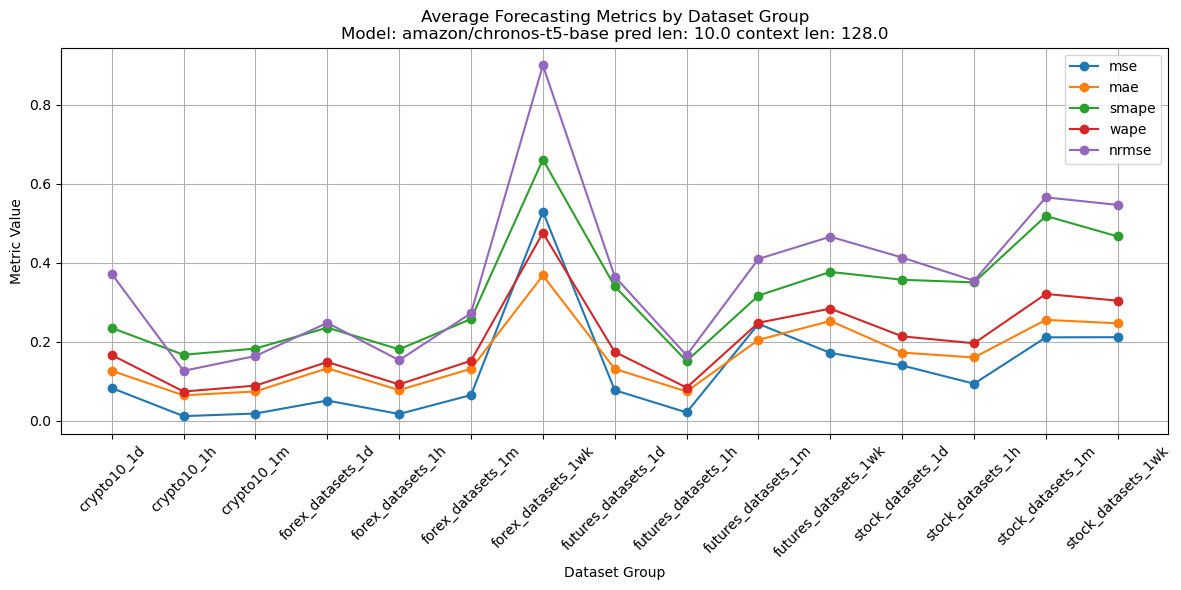


🔢 Total number of results.json files found: 908


In [10]:
#config
# Define the root result directory
root_dir = Path(r"results\chronos\chronos_medium_of1\h10")
show_results(root_dir)


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,0.189030,0.325202,0.193800,0.255997,0.562175,3653.333333,2840.513428,13.037087,20.0,128.0,crypto10_1d
1,0.022463,0.217314,0.090949,0.104515,0.172314,20880.000000,18160.557617,74.120396,20.0,128.0,crypto10_1h
2,0.045453,0.258929,0.118816,0.142354,0.255641,8853.333333,7392.073242,31.378415,20.0,128.0,crypto10_1m
3,0.098249,0.323681,0.190858,0.213540,0.342040,6920.000000,6179.074707,24.694171,20.0,128.0,forex_datasets_1d
4,0.035349,0.243903,0.114050,0.135007,0.217922,20693.333333,17704.054688,73.085600,20.0,128.0,forex_datasets_1h
5,0.125556,0.331620,0.183275,0.211933,0.370630,12160.000000,10519.006510,43.038003,20.0,128.0,forex_datasets_1m
6,0.520282,0.816365,0.476959,0.617462,0.930996,2000.000000,1563.865031,7.242395,20.0,128.0,forex_datasets_1wk
7,0.159650,0.458584,0.196314,0.261146,0.525147,7240.000000,5461.366089,25.694288,20.0,128.0,futures_datasets_1d
8,0.041569,0.218999,0.114477,0.129533,0.230698,16160.000000,14281.685547,57.365257,20.0,128.0,futures_datasets_1h
9,0.276225,0.373882,0.241718,0.291855,0.471529,9120.000000,7832.895752,32.199343,20.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                0.2036
smape              0.4191
mae                0.2323
wape               0.2848
nrmse              0.4875
num_elements    8500.5135
abs_sum         7219.2052
total_time        30.1501
pred_len          20.0000
context_len      128.0000
dtype: float64


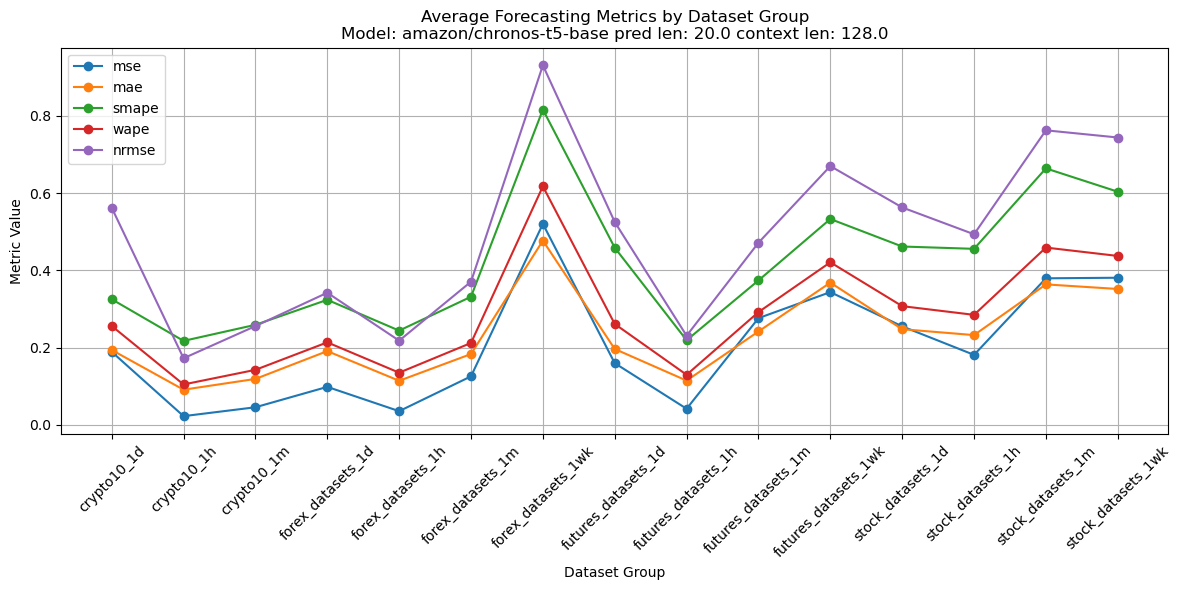


🔢 Total number of results.json files found: 908


In [11]:
#config
# Define the root result directory
root_dir = Path(r"results\chronos\chronos_medium_of1\h20")
show_results(root_dir)


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,0.323615,0.407364,0.266197,0.350821,0.729501,3680.000000,2867.131429,12.707376,30.0,128.0,crypto10_1d
1,0.032079,0.259757,0.109269,0.125566,0.205927,20880.000000,18160.559570,73.796457,30.0,128.0,crypto10_1h
2,0.069177,0.321133,0.147455,0.177562,0.316840,8800.000000,7310.747884,30.259997,30.0,128.0,crypto10_1m
3,0.148195,0.367746,0.236429,0.264485,0.422478,6900.000000,6164.434570,23.912120,30.0,128.0,forex_datasets_1d
4,0.052525,0.297272,0.141093,0.167917,0.266314,20640.000000,17603.581380,70.471757,30.0,128.0,forex_datasets_1h
5,0.167255,0.388266,0.226900,0.262664,0.439636,12120.000000,10474.398112,41.547138,30.0,128.0,forex_datasets_1m
6,1.228303,0.906564,0.586857,0.762738,1.367259,2040.000000,1600.562541,7.170566,30.0,128.0,forex_datasets_1wk
7,0.229134,0.525748,0.237619,0.317124,0.632376,7200.000000,5408.967285,24.832633,30.0,128.0,futures_datasets_1d
8,0.059484,0.262886,0.141894,0.160334,0.275589,16080.000000,14230.698242,55.514863,30.0,128.0,futures_datasets_1h
9,0.345779,0.428125,0.282848,0.340694,0.545721,9080.000000,7780.715047,31.109778,30.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                0.3222
smape              0.4816
mae                0.2842
wape               0.3487
nrmse              0.6016
num_elements    8482.6778
abs_sum         7197.0067
total_time        29.2669
pred_len          30.0000
context_len      128.0000
dtype: float64


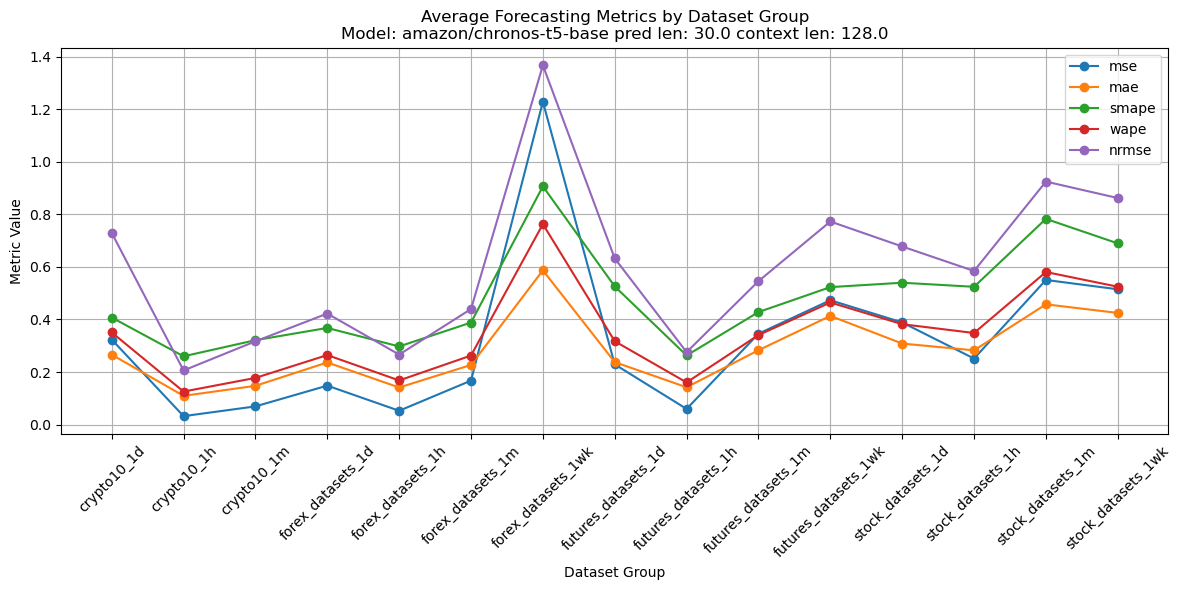


🔢 Total number of results.json files found: 908


In [12]:
#config
# Define the root result directory
root_dir = Path(r"results\chronos\chronos_medium_of1\h30")
show_results(root_dir)


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,0.607564,0.564260,0.405005,0.545753,1.019291,3600.000000,2775.409180,12.385406,60.0,128.0,crypto10_1d
1,0.070448,0.353426,0.164386,0.188893,0.304954,20880.000000,18160.557617,71.174293,60.0,128.0,crypto10_1h
2,0.152610,0.444545,0.235769,0.283544,0.470644,8800.000000,7310.747721,30.085735,60.0,128.0,crypto10_1m
3,0.264955,0.481883,0.324761,0.362429,0.562918,6840.000000,6124.638184,23.496845,60.0,128.0,forex_datasets_1d
4,0.108775,0.396597,0.204273,0.242888,0.382196,20560.000000,17539.440104,69.904022,60.0,128.0,forex_datasets_1h
5,0.319583,0.532389,0.331728,0.385112,0.619048,12000.000000,10344.388346,40.803659,60.0,128.0,forex_datasets_1m
6,2.155125,1.099903,0.764741,0.995082,1.783581,1920.000000,1488.001546,6.684373,60.0,128.0,forex_datasets_1wk
7,0.470784,0.682346,0.352932,0.476778,0.921911,7080.000000,5251.835938,24.141161,60.0,128.0,futures_datasets_1d
8,0.114182,0.364908,0.208125,0.235171,0.381821,16080.000000,14230.702148,55.123040,60.0,128.0,futures_datasets_1h
9,0.390757,0.526163,0.351946,0.420803,0.645181,9000.000000,7713.614176,30.547386,60.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                0.5662
smape              0.6329
mae                0.4034
wape               0.4995
nrmse              0.8189
num_elements    8412.9351
abs_sum         7119.8149
total_time        28.7007
pred_len          60.0000
context_len      128.0000
dtype: float64


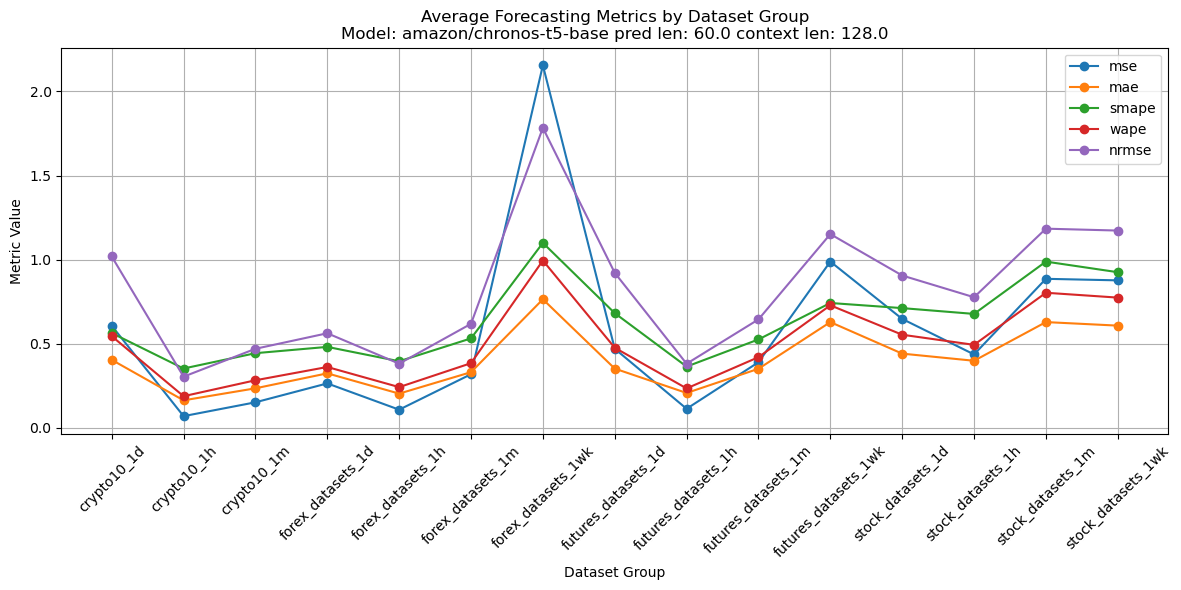


🔢 Total number of results.json files found: 908


In [13]:
#config
# Define the root result directory
root_dir = Path(r"results\chronos\chronos_medium_of1\h60")
show_results(root_dir)


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,0.708525,0.696846,0.483989,0.659845,1.102559,3584.000000,2755.319255,13.467461,96.0,128.0,crypto10_1d
1,0.101196,0.411894,0.204036,0.234968,0.366157,20736.000000,18006.963867,77.146982,96.0,128.0,crypto10_1h
2,0.243668,0.546192,0.312213,0.381174,0.599517,8704.000000,7165.317383,32.634545,96.0,128.0,crypto10_1m
3,0.378065,0.667443,0.424724,0.481598,0.688477,6720.000000,5925.901855,25.172517,96.0,128.0,forex_datasets_1d
4,0.163525,0.477213,0.253566,0.300431,0.464522,20608.000000,17631.636068,76.386687,96.0,128.0,forex_datasets_1h
5,0.352218,0.582963,0.379235,0.441559,0.662454,11904.000000,10240.671549,44.203011,96.0,128.0,forex_datasets_1m
6,1.591650,1.305099,0.930035,1.194960,1.625928,1920.000000,1488.001587,7.262284,96.0,128.0,forex_datasets_1wk
7,0.748208,0.819374,0.465678,0.623743,1.127711,7200.000000,5421.123291,26.874531,96.0,128.0,futures_datasets_1d
8,0.181402,0.475971,0.266348,0.301351,0.481885,16128.000000,14254.699219,60.253443,96.0,128.0,futures_datasets_1h
9,0.479201,0.593721,0.418510,0.497057,0.752982,9024.000000,7729.359985,33.568106,96.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                0.7011
smape              0.7809
mae                0.5136
wape               0.6371
nrmse              0.9455
num_elements    8374.2386
abs_sum         7074.0949
total_time        31.1972
pred_len          96.0000
context_len      128.0000
dtype: float64


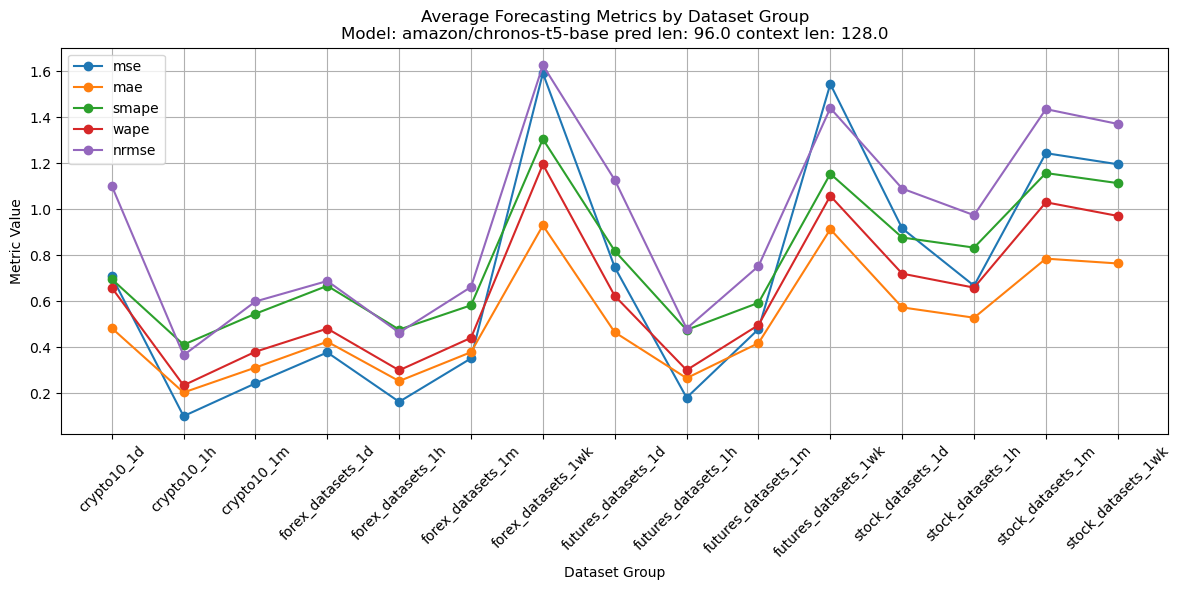


🔢 Total number of results.json files found: 908


In [14]:
#config
# Define the root result directory
root_dir = Path(r"results\chronos\chronos_medium_of1\h96")
show_results(root_dir)

## Chronos Large

In [ ]:
#config
# Define the root result directory
root_dir = Path(r"results\tsfm\tsfm_500m_of1\h10")
show_results(root_dir)

In [ ]:
#config
# Define the root result directory
root_dir = Path(r"")
show_results(root_dir)

In [ ]:
#config
# Define the root result directory
root_dir = Path(r"results\tsfm\tsfm_500m_of1\h30")
show_results(root_dir)

In [ ]:
#config
# Define the root result directory
root_dir = Path(r"")
show_results(root_dir)


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,1.275651,0.777921,0.657820,0.901977,1.501043,3584.000000,2755.319255,0.465700,96.0,128.0,crypto10_1d
1,0.106263,0.419566,0.215820,0.248533,0.374963,20736.000000,18006.963867,2.354477,96.0,128.0,crypto10_1h
2,0.264981,0.571621,0.333160,0.406429,0.625476,8704.000000,7165.317383,0.958935,96.0,128.0,crypto10_1m
3,0.430594,0.654025,0.445811,0.505474,0.727587,6720.000000,5925.901855,0.939740,96.0,128.0,forex_datasets_1d
4,0.216686,0.494924,0.287013,0.340292,0.528097,20608.000000,17631.636068,2.168664,96.0,128.0,forex_datasets_1h
5,0.440671,0.609860,0.421853,0.490706,0.741928,11904.000000,10240.671549,1.320845,96.0,128.0,forex_datasets_1m
6,2.950444,1.356815,1.303821,1.685226,2.229202,1920.000000,1488.001587,0.280996,96.0,128.0,forex_datasets_1wk
7,0.700693,0.792001,0.473009,0.631751,1.106400,7200.000000,5421.123291,0.814871,96.0,128.0,futures_datasets_1d
8,0.205973,0.481169,0.279272,0.315972,0.513485,16128.000000,14254.699219,1.804585,96.0,128.0,futures_datasets_1h
9,0.473364,0.619147,0.436363,0.517042,0.766018,9024.000000,7729.359985,0.957178,96.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                0.9156
smape              0.7867
mae                0.5844
wape               0.7291
nrmse              1.0696
num_elements    8374.2386
abs_sum         7074.0949
total_time         0.9498
pred_len          96.0000
context_len      128.0000
dtype: float64


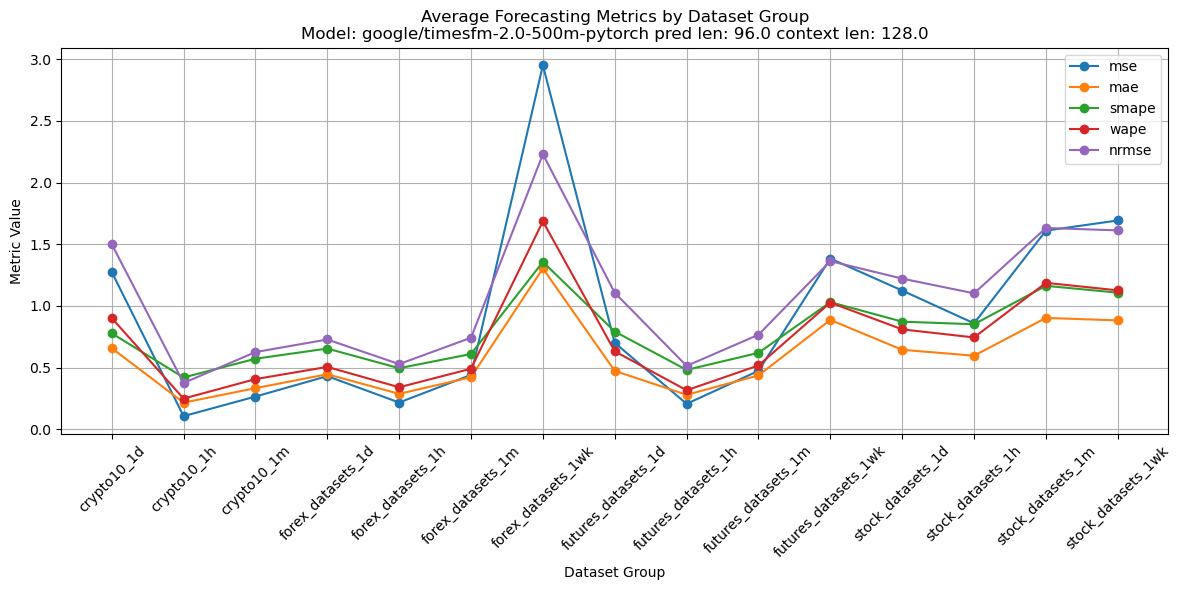


🔢 Total number of results.json files found: 908


In [ ]:
#config
# Define the root result directory
root_dir = Path(r"results\tsfm\tsfm_500m_of1\h96")
show_results(root_dir)